##**25DLS037_AKSHIT_SHARMA**

In [3]:
pip install tensorflow scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 546.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3467 - val_loss: 0.1590
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1498 - val_loss: 0.1250
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1213 - val_loss: 0.1078
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1060 - val_loss: 0.0973
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0963 - val_loss: 0.0900
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0896 - val_loss: 0.0850
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0850 - val_loss: 0.0817
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0816 - val_loss: 0.0791
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0794 - val_loss: 0.0775
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0778 - val_loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


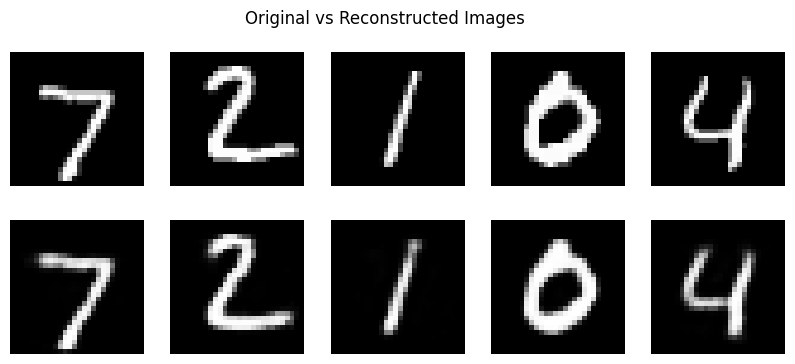

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

(x_train, _), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Build Autoencoder
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Original vs Reconstructed Images")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


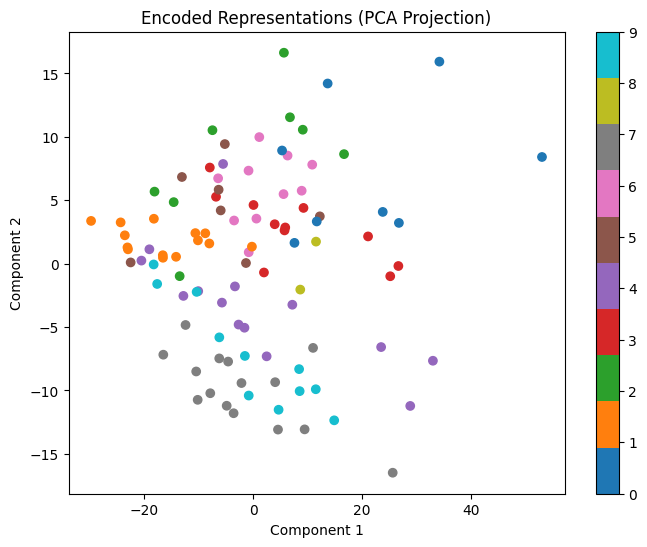

In [5]:
# Encoder model
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test[:100])

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(encoded_imgs)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_test[:100], cmap='tab10')
plt.colorbar()
plt.title("Encoded Representations (PCA Projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3443 - val_loss: 0.1957
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1856 - val_loss: 0.1592
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1558 - val_loss: 0.1434
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1413 - val_loss: 0.1337
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1329 - val_loss: 0.1278
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1277 - val_loss: 0.1244
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1245 - val_loss: 0.1219
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1218 - val_loss: 0.1203
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1203 - val_loss: 0.1187
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1186 - val_loss: 0.1176


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


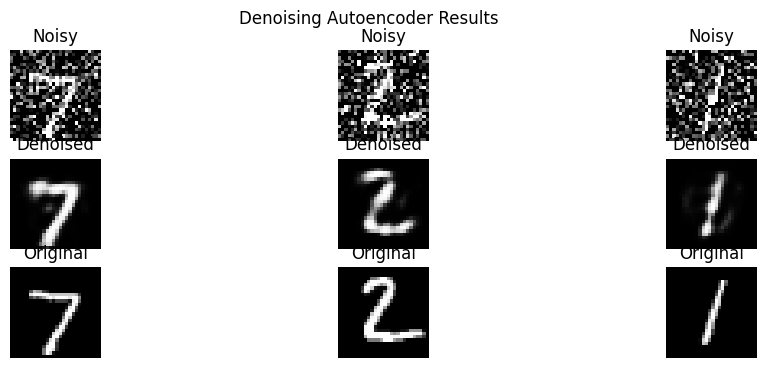

In [6]:
# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoising Autoencoder
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
denoising_autoencoder = Model(input_img, decoded)

denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_denoised = denoising_autoencoder.predict(x_test_noisy)

n = 3
plt.figure(figsize=(12, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_title("Noisy")
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_denoised[i].reshape(28, 28), cmap='gray')
    ax.set_title("Denoised")
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    ax.axis('off')
plt.suptitle("Denoising Autoencoder Results")
plt.show()
